**Problem Statement**:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,BayesianRidge,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import NuSVR
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.feature_selection import SelectKBest,chi2
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import random
import joblib
%matplotlib inline

#### Uploading dataset

In [2]:
df=pd.read_excel('Data_Train.xlsx',engine='openpyxl')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
test=pd.read_excel('Test_set.xlsx',engine='openpyxl')
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


### EDA

In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (10683, 11)


In [6]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### Target Variable is numeric type rest all are categorical type

In [8]:
print('Number of rows x columns in dataset are:',test.shape)
print('Dataset contains any null values:',test.isnull().values.any())
test.info()

Number of rows x columns in dataset are: (2671, 10)
Dataset contains any null values: False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


##### look for missing values

In [9]:
df[df.Total_Stops.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


#### Check for similar parameters to determine how to fill Route

In [10]:
df[df['Source']=='Delhi'][df['Destination']=='Cochin'][df['Duration']=='23h 40m'][df['Airline']=='Air India'][df['Price']==7480]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1616,Air India,24/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 25 May,23h 40m,1 stop,No info,7480
2554,Air India,15/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 16 May,23h 40m,1 stop,No info,7480
4351,Air India,27/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 28 Jun,23h 40m,1 stop,No info,7480
7896,Air India,12/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 13 Jun,23h 40m,1 stop,No info,7480
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


##### Filling NaN Values with most appeared route

In [11]:
df.loc[9039,'Route']='DEL → MAA → COK'
df.loc[9039,'Total_Stops']='1 stop'
df.loc[[9039]]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 07 May,23h 40m,1 stop,No info,7480


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


##### Check for other missingh values that might consist whitespace or ? in dataset

In [13]:
for i in df.columns:
    if 0<len(df[df[i]==' ']):
        print(i)
        print(len(df[df[i]==' ']))

In [14]:
for i in df.columns:
    if 0<len(df[df[i]=='']):
        print(i)
        print(len(df[df[i]=='']))

In [15]:
for i in df.columns:
    if 0<len(df[df[i]=='?']):
        print(i)
        print(len(df[df[i]=='?']))

#### No nulls remaining

In [16]:
df.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

##### Converting Date of journey into 3 columns

In [17]:
date=[]
month=[]
year=[]
for i in range(len(df.Date_of_Journey)):
    date.append(int(df.Date_of_Journey[i].split('/')[0]))
    month.append(int(df.Date_of_Journey[i].split('/')[1]))
    year.append(int(df.Date_of_Journey[i].split('/')[2]))

In [18]:
df['date']=date
df['month']=month
df['year']=year
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


drop column year as it contains same value in the whole dataset & Date_of_Journey is already been replaced by date and month column
drop date column also as month wise price should be changing not every other day
also drop column route as the imp data there was supposed to be how many stops which is already been shown in total stops
also drop arrival time, departure time as column duration is enough

In [19]:
df=df.drop(['Date_of_Journey','year','date','Route','Dep_Time','Arrival_Time'],axis=1)

In [20]:
date=[]
month=[]
year=[]
for i in range(len(test.Date_of_Journey)):
    date.append(int(test.Date_of_Journey[i].split('/')[0]))
    month.append(int(test.Date_of_Journey[i].split('/')[1]))
    year.append(int(test.Date_of_Journey[i].split('/')[2]))
test['date']=date
test['month']=month
test['year']=year
test=test.drop(['Date_of_Journey','year','date','Route','Dep_Time','Arrival_Time'],axis=1)

##### conv duration column into mins column

In [21]:
total=[]
for i in range(len(df.Duration)):
    if len(df.Duration[i].split())>1:
        hour=int(df.Duration[i].split()[0][:-1])*60
        minute=int(df.Duration[i].split()[1][:-1])
        total.append(hour+minute)
    else:
        if df.Duration[i].split()[0][-1]=='h':
            total.append(int(df.Duration[i].split()[0][:-1])*60)
        else:
            total.append(int(df.Duration[i].split()[0][:-1]))
df['Time']=total
total=[]
for i in range(len(test.Duration)):
    if len(test.Duration[i].split())>1:
        hour=int(test.Duration[i].split()[0][:-1])*60
        minute=int(test.Duration[i].split()[1][:-1])
        total.append(hour+minute)
    else:
        if test.Duration[i].split()[0][-1]=='h':
            total.append(int(test.Duration[i].split()[0][:-1])*60)
        else:
            total.append(int(test.Duration[i].split()[0][:-1]))
test['Time']=total
df=df.drop(['Duration'],axis=1)
test=test.drop(['Duration'],axis=1)

In [22]:
for i in range(len(df.Total_Stops)):
    if df.Total_Stops[i]=='1 stop':
        df.Total_Stops[i]=1
    elif df.Total_Stops[i]=='non-stop':
        df.Total_Stops[i]=0
    elif df.Total_Stops[i]=='2 stops':
        df.Total_Stops[i]=2
    elif df.Total_Stops[i]=='3 stops':
        df.Total_Stops[i]=3
    elif df.Total_Stops[i]=='4 stops':
        df.Total_Stops[i]=4
for i in range(len(test.Total_Stops)):
    if test.Total_Stops[i]=='1 stop':
        test.Total_Stops[i]=1
    elif test.Total_Stops[i]=='non-stop':
        test.Total_Stops[i]=0
    elif test.Total_Stops[i]=='2 stops':
        test.Total_Stops[i]=2
    elif test.Total_Stops[i]=='3 stops':
        test.Total_Stops[i]=3
    elif test.Total_Stops[i]=='4 stops':
        test.Total_Stops[i]=4

##### categorize source and destination together, as they share same values

In [23]:
listy=list(set(df.Source.values))
misty=list(set(df.Destination.values))
listy.extend(misty)
unique=list(set(listy))
dicty={}
for i in range(len(unique)):
    dicty[unique[i]]=i
print(dicty)
print(df.Source.value_counts())
print(df.Destination.value_counts())
print(test.Source.value_counts())
print(test.Destination.value_counts())

{'Kolkata': 0, 'New Delhi': 1, 'Hyderabad': 2, 'Delhi': 3, 'Banglore': 4, 'Cochin': 5, 'Mumbai': 6, 'Chennai': 7}
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [24]:
for i in range(len(df.Source)):
    df['Source'][i]=dicty[df['Source'][i]]
for i in range(len(test.Source)):
    test['Source'][i]=dicty[test['Source'][i]]
for i in range(len(df.Destination)):
    df['Destination'][i]=dicty[df['Destination'][i]]
for i in range(len(test.Source)):
    test['Destination'][i]=dicty[test['Destination'][i]]
print(df.Source.value_counts())
print(df.Destination.value_counts())
print(test.Source.value_counts())
print(test.Destination.value_counts())

3    4537
0    2871
4    2197
6     697
7     381
Name: Source, dtype: int64
5    4537
4    2871
3    1265
1     932
2     697
0     381
Name: Destination, dtype: int64
3    1145
0     710
4     555
6     186
7      75
Name: Source, dtype: int64
5    1145
4     710
3     317
1     238
2     186
0      75
Name: Destination, dtype: int64


#### categorize airline and additional info column

In [25]:
dicty={}
for j in ['Airline','Additional_Info']:
    for i in df[[j]]:
        dicto={}
        for j in range(len(df[i].unique())):
            dicto[df[i].unique()[j]]=j
        dicty[i]=dicto
dicty

{'Airline': {'IndiGo': 0,
  'Air India': 1,
  'Jet Airways': 2,
  'SpiceJet': 3,
  'Multiple carriers': 4,
  'GoAir': 5,
  'Vistara': 6,
  'Air Asia': 7,
  'Vistara Premium economy': 8,
  'Jet Airways Business': 9,
  'Multiple carriers Premium economy': 10,
  'Trujet': 11},
 'Additional_Info': {'No info': 0,
  'In-flight meal not included': 1,
  'No check-in baggage included': 2,
  '1 Short layover': 3,
  'No Info': 4,
  '1 Long layover': 5,
  'Change airports': 6,
  'Business class': 7,
  'Red-eye flight': 8,
  '2 Long layover': 9}}

In [26]:
dicty['Additional_Info']['No Info']=dicty['Additional_Info']['No info']

In [27]:
for j in ['Airline','Additional_Info']:
    for i in [j]:
        df[i]=df[i].apply(lambda x:dicty[i][x])
for j in ['Airline','Additional_Info']:
    for i in [j]:
        test[i]=test[i].apply(lambda x:dicty[i][x])

In [28]:
test

,Airline,Source,Destination,Total_Stops,Additional_Info,month,Time
0,2,3,5,1,0,6,655
1,0,0,4,1,0,5,240
2,2,3,5,1,1,5,1425
3,4,3,5,1,0,5,780
4,7,4,3,0,0,6,170
...,...,...,...,...,...,...,...
2666,1,0,4,1,0,6,1435
2667,0,0,4,0,0,3,155
2668,2,3,5,1,0,3,395
2669,1,3,5,1,0,3,915


In [29]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,Time
0,0,4,1,0,0,3897,3,170
1,1,0,4,2,0,7662,5,445
2,2,3,5,2,0,13882,6,1140
3,0,0,4,1,0,6218,5,325
4,0,4,1,1,0,13302,3,285
...,...,...,...,...,...,...,...,...
10678,7,0,4,0,0,4107,4,150
10679,1,0,4,0,0,4145,4,155
10680,2,4,3,0,0,7229,4,180
10681,6,4,1,0,0,12648,3,160


In [30]:
df = df.astype({'Destination': np.int64})
df = df.astype({'Source': np.int64})
df = df.astype({'Total_Stops': np.int64})
test = test.astype({'Destination': np.int64})
test = test.astype({'Source': np.int64})
test = test.astype({'Total_Stops': np.int64})

### Statistical summary

In [31]:
df.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,Time
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,2.151456,2.737808,3.771413,0.824207,0.262754,9087.064121,4.708602,643.093232
std,1.784625,1.927117,1.451835,0.675199,0.580647,4611.359167,1.164357,507.862001
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,3.000000,5.000000
25%,1.000000,0.000000,3.000000,0.000000,0.000000,5277.000000,3.000000,170.000000
50%,2.000000,3.000000,4.000000,1.000000,0.000000,8372.000000,5.000000,520.000000
75%,3.000000,4.000000,5.000000,1.000000,0.000000,12373.000000,6.000000,930.000000
max,11.000000,7.000000,5.000000,4.000000,9.000000,79512.000000,6.000000,2860.000000


##### High Standard Deviation in some columns.
Huge Variance in upper quartile range in price and time columns which be result of having outliers in them  

### Correlation

In [32]:
df.corr()['Price']

Airline            0.067032
Source            -0.188928
Destination        0.221296
Total_Stops        0.603883
Additional_Info    0.014019
Price              1.000000
month             -0.103651
Time               0.506371
Name: Price, dtype: float64

<AxesSubplot:>

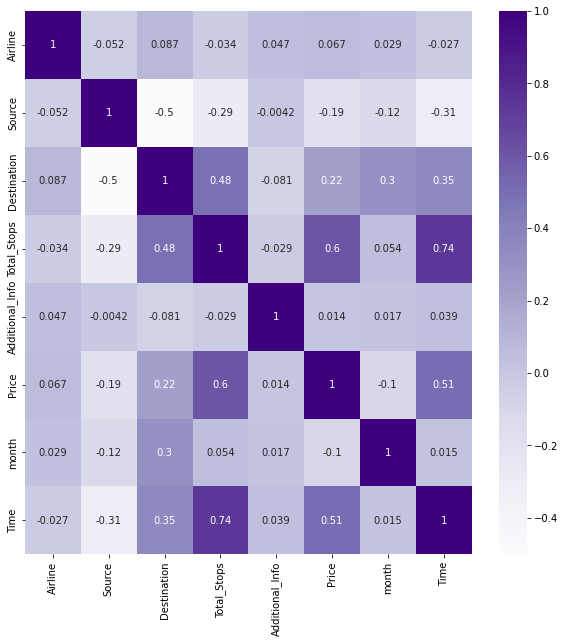

In [33]:
plt.figure(figsize=[10,10])
sn.heatmap(df.corr(),annot=True,cmap='Purples')

<AxesSubplot:>

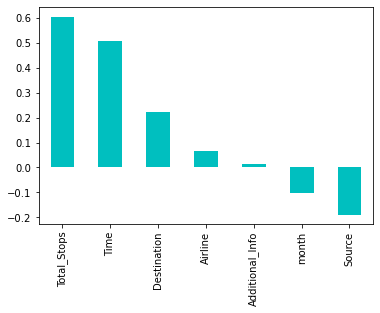

In [34]:
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')

#### Check Distribution Plots

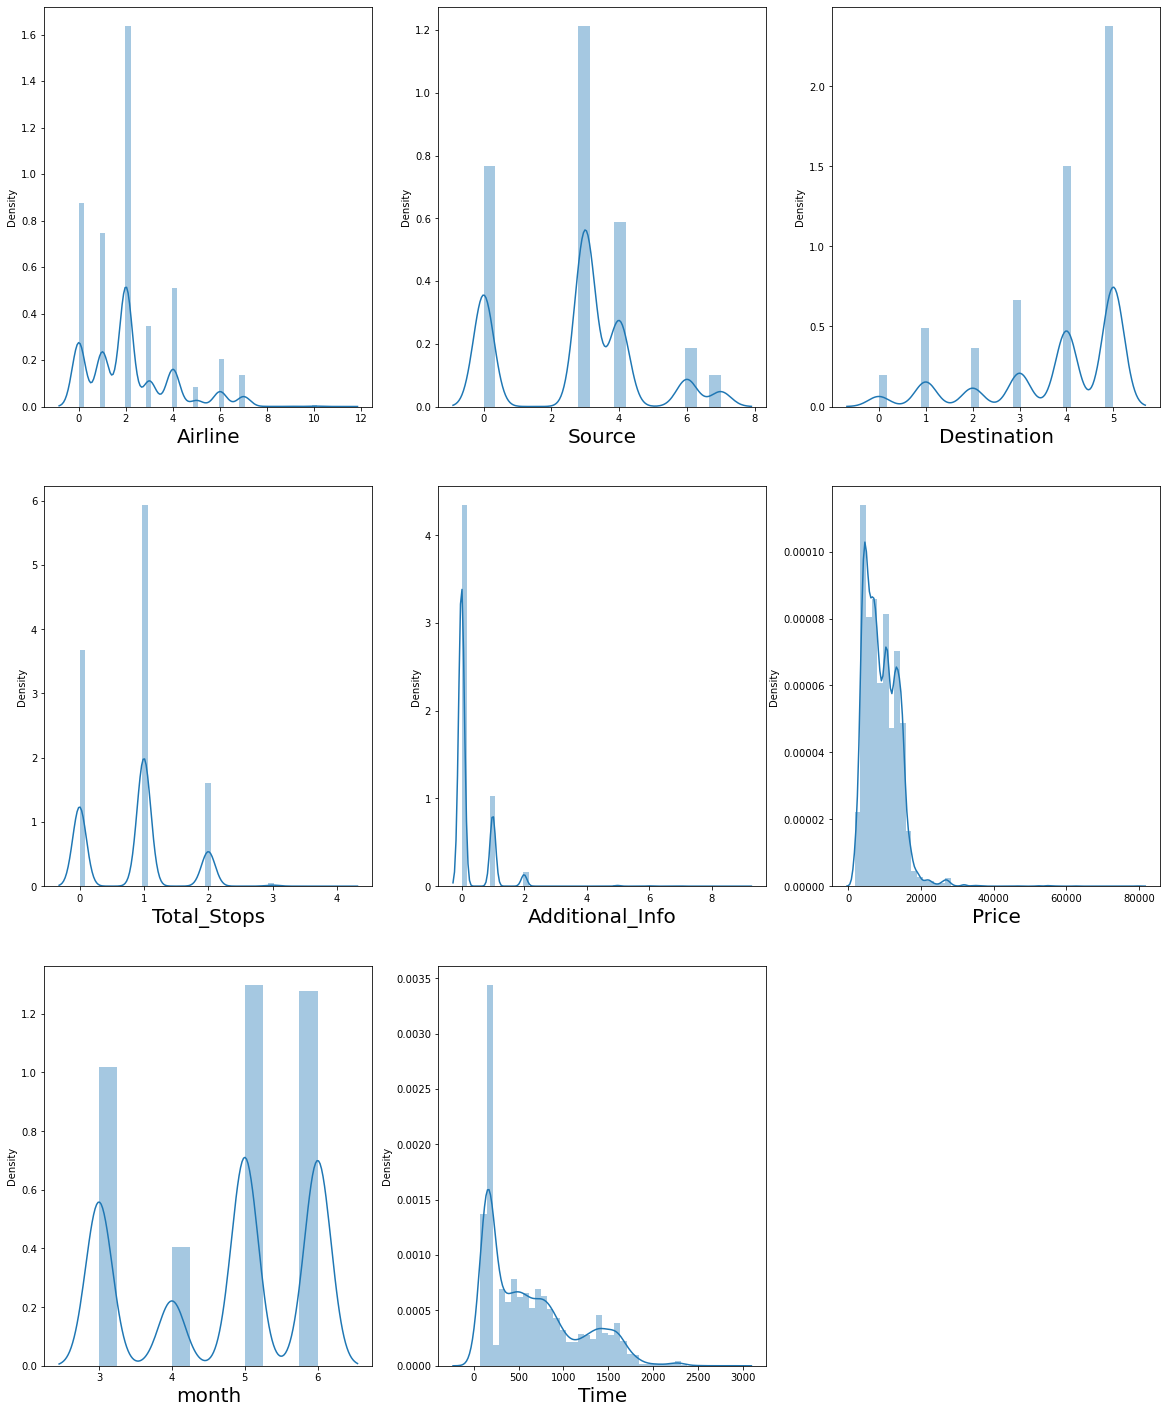

In [35]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(3,3,plotnumber)
        sn.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### All Columns seems baised other than that most column are bimodial type

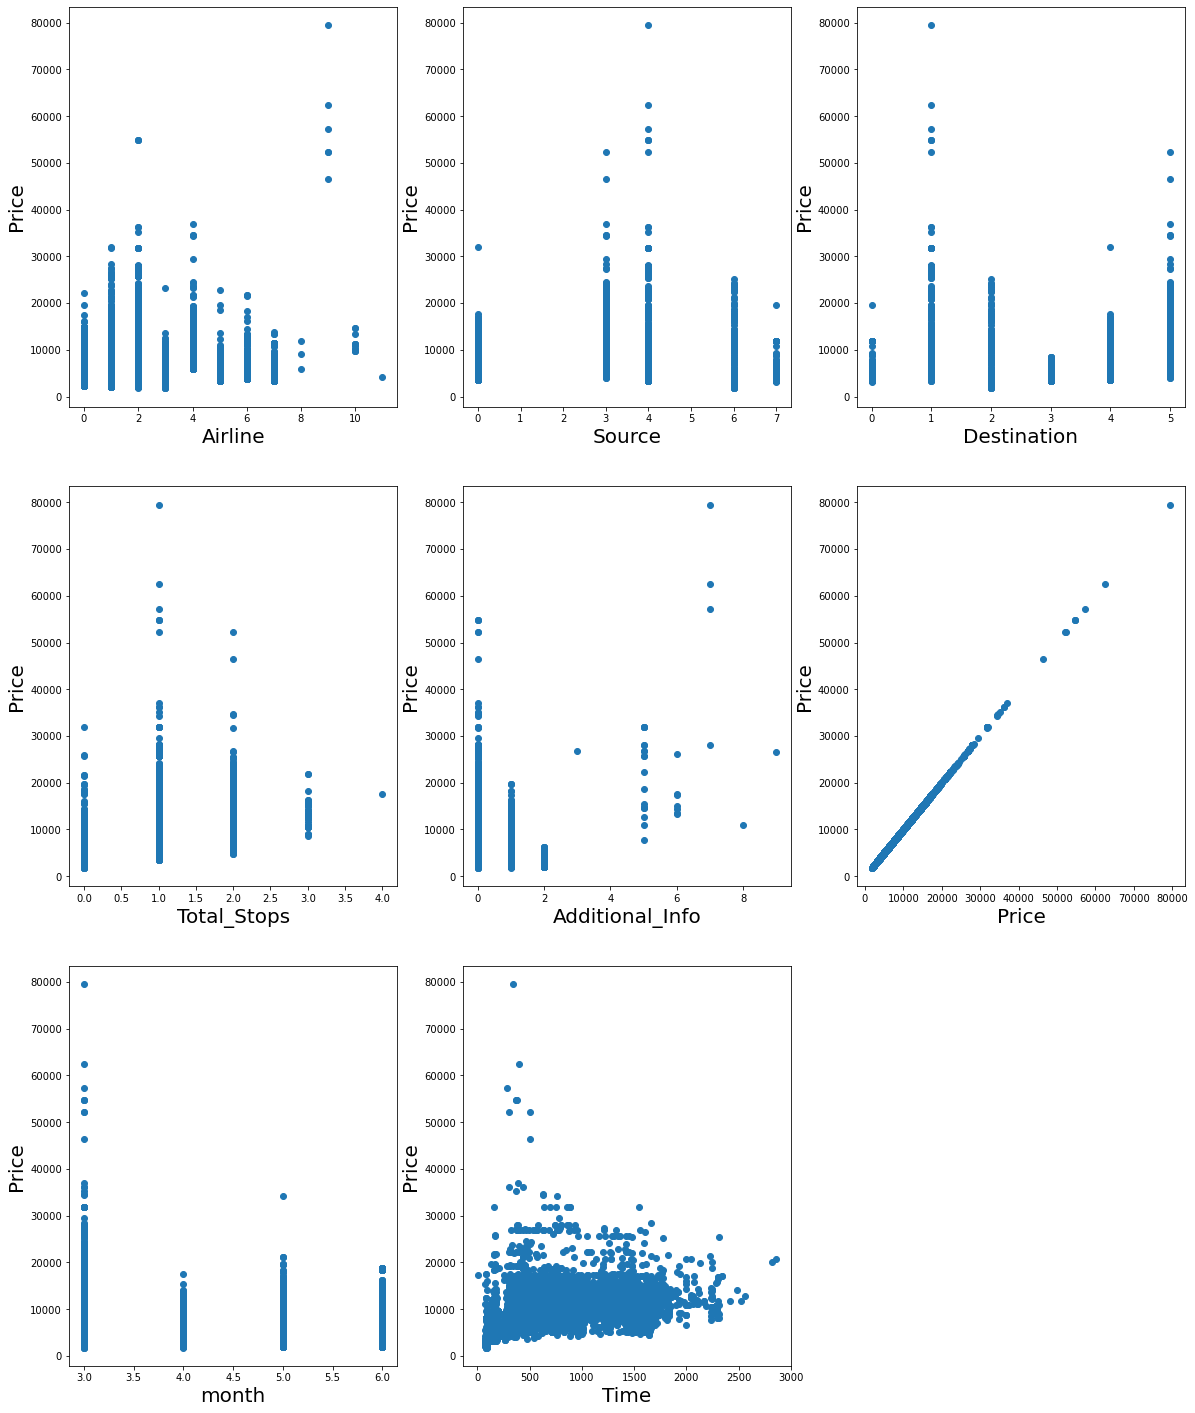

In [36]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(df[i],df['Price'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.show()

#### time column has data scattered

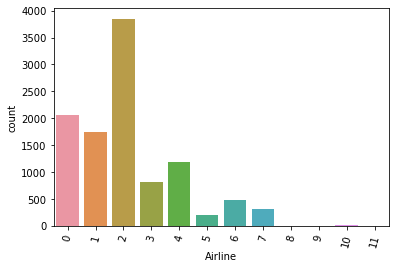

In [37]:
sn.countplot(x='Airline',data=df)
plt.xticks(rotation=75)
plt.show()

###### Jet Airways has more people 

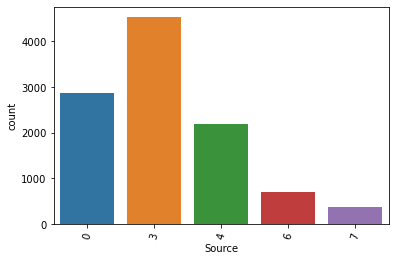

In [38]:
sn.countplot(x='Source',data=df)
plt.xticks(rotation=75)
plt.show()

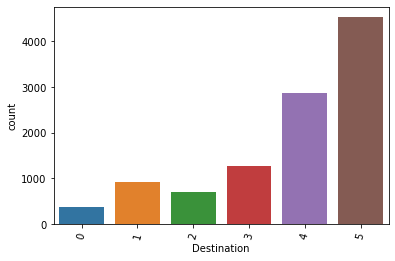

In [39]:
sn.countplot(x='Destination',data=df)
plt.xticks(rotation=75)
plt.show()

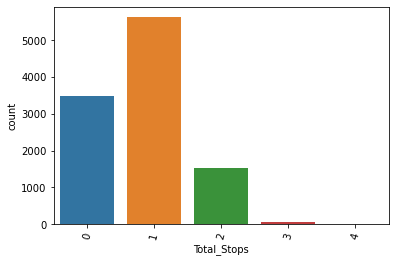

In [40]:
sn.countplot(x='Total_Stops',data=df)
plt.xticks(rotation=75)
plt.show()

#### It has aleast one stop

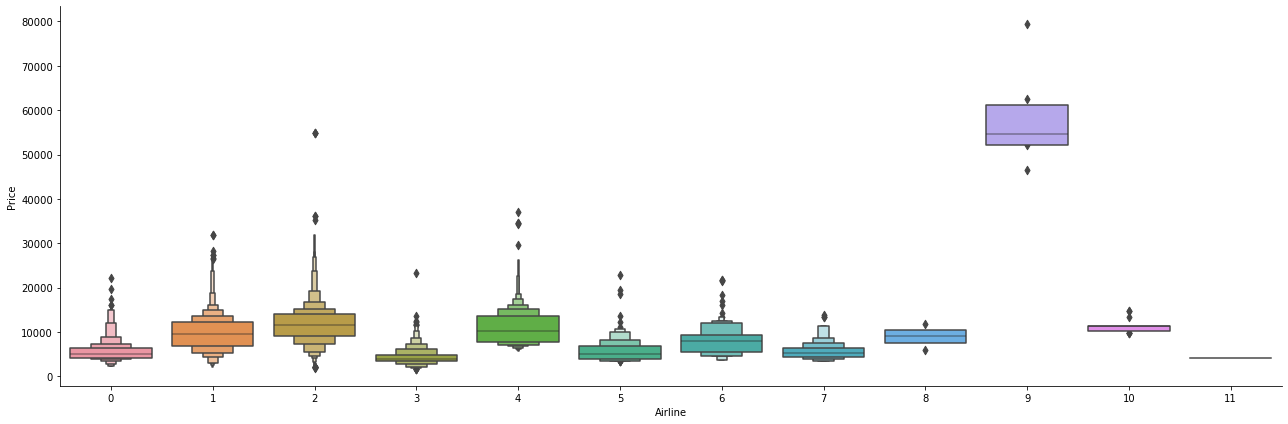

In [41]:
sn.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

#### Air asia Price are jacked up than others

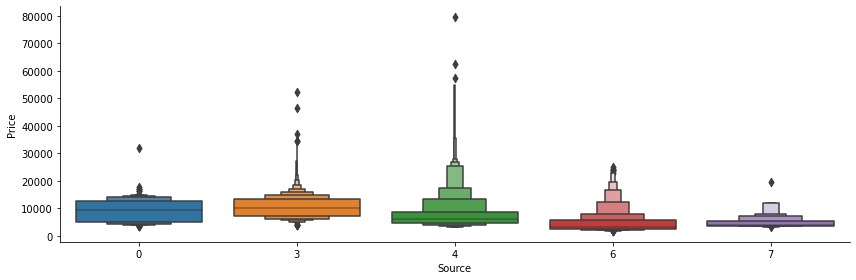

In [42]:
sn.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

##### Bangalore is costlier source place to go on 

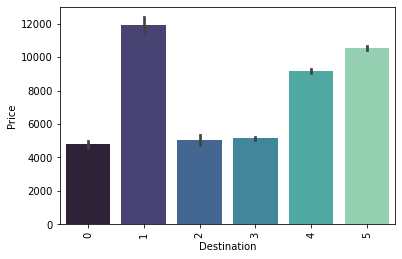

In [43]:
sn.barplot(x='Destination',y='Price',data=df,dodge=True,palette='mako')
plt.xticks(rotation=90)
plt.show()

#### Kolkota as destination got more price than others

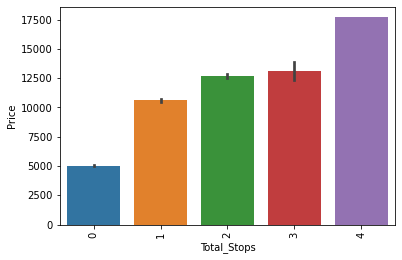

In [44]:
sn.barplot(x='Total_Stops',y='Price',data=df,dodge=True)
plt.xticks(rotation=90)
plt.show()

##### More the stops more the price

#### Outliers Check

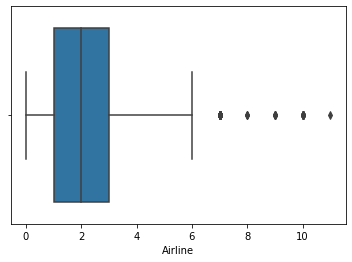

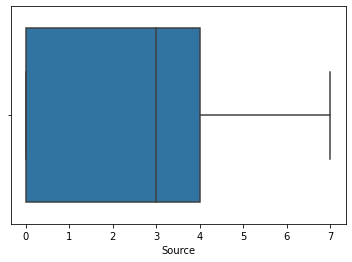

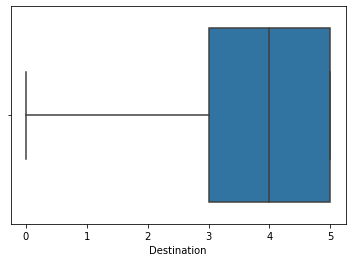

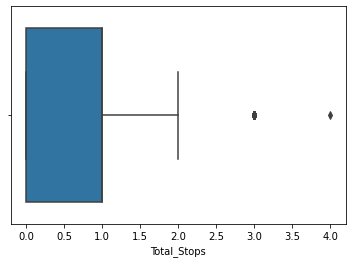

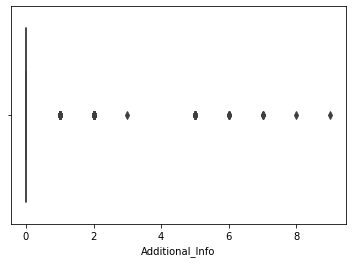

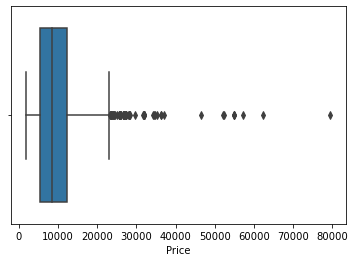

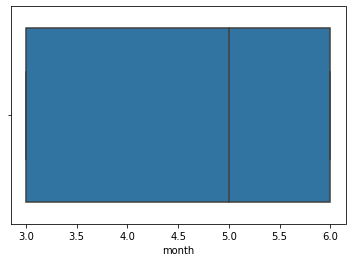

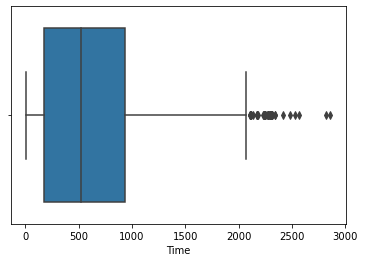

In [45]:
for i in df.columns:
    sn.boxplot(df[i])
    plt.show()

##### Outliers present 
try to remove using z-Score/IQR method

In [46]:
z_scr=zscore(df)
print(df.shape)
df_new=df.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(10683, 8)
(10457, 8)


In [47]:
print('Data loss:',((10683-10457)/10683)*100)

Data loss: 2.1155106243564545


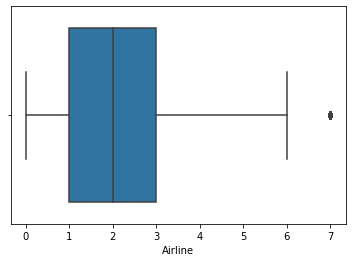

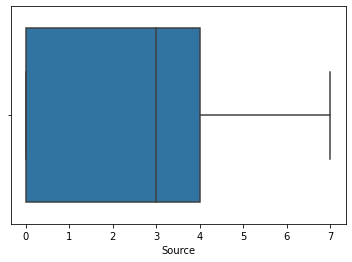

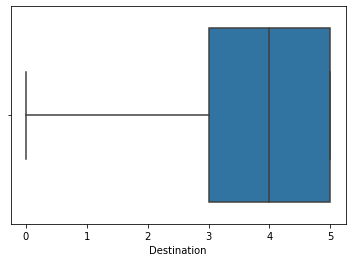

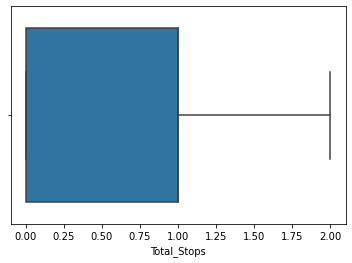

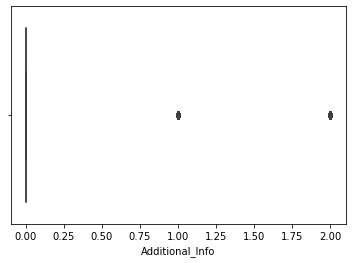

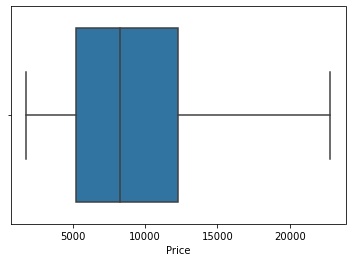

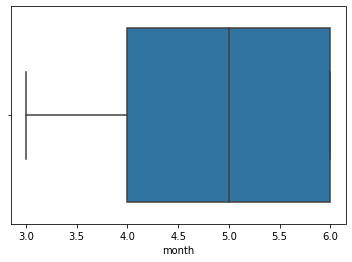

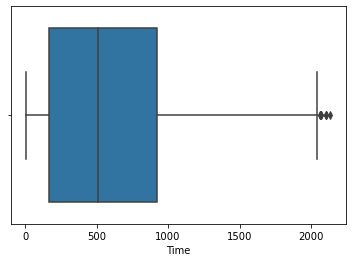

In [48]:
for i in df_new.columns:
    sn.boxplot(df_new[i])
    plt.show()

In [49]:
z_scr=zscore(df_new)
print(df_new.shape)
df=df_new.loc[(abs(z_scr)<3).all(axis=1)]
print(df.shape)

(10457, 8)
(10099, 8)


In [50]:
print('Data loss:',((10457-10099)/10457)*100)

Data loss: 3.423544037486851


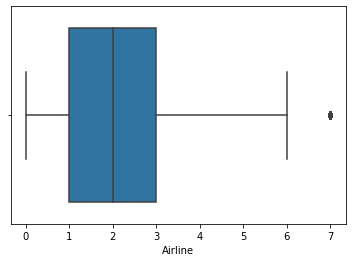

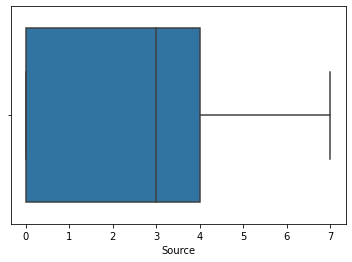

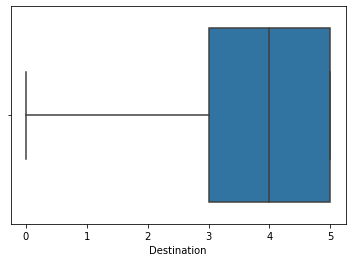

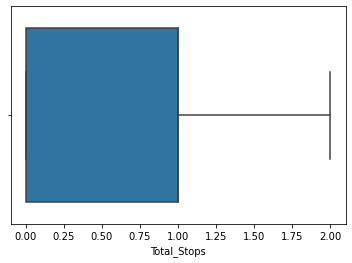

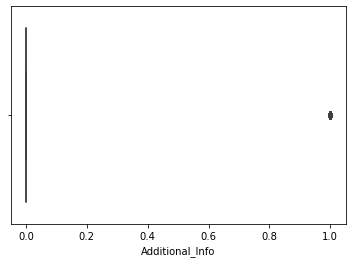

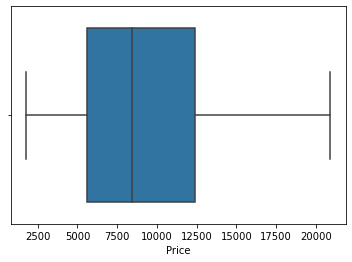

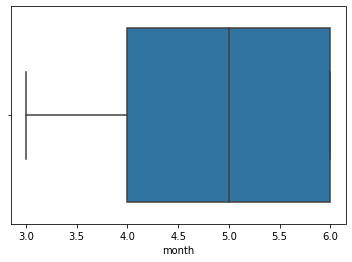

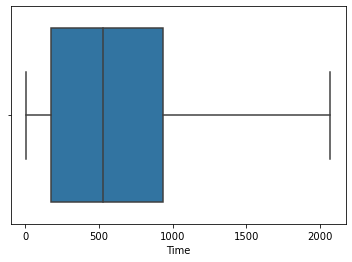

In [51]:
for i in df.columns:
    sn.boxplot(df[i])
    plt.show()

##### outliers of non categorical values are removed

#### Spliting Target & Input variable

In [52]:
y = df[['Price']]
x = df.drop(columns = ['Price'],axis=1)

#### Skewness Check

In [53]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))# Number of features having skewness more than 0.55

Airline            0.973893
Source            -0.014545
Destination       -1.180082
Total_Stops        0.191942
Additional_Info    1.535326
month             -0.431797
Time               0.738539
dtype: float64
3


In [54]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [55]:
for index in test.skew().index:
    if test.skew().loc[index] >0.55:
        test[index]=np.cbrt(test[index])

In [56]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

Airline           -0.893934
Source            -0.014545
Destination       -1.180082
Total_Stops        0.191942
Additional_Info    1.535326
month             -0.431797
Time               0.109080
dtype: float64
1


#### Feature Scaling

In [57]:
scaler = StandardScaler()
x[['Time']] = scaler.fit_transform(x[['Time']])
test[['Time']]=scaler.transform(test[['Time']])

#### Multicollinearity Check

In [58]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,4.369646,Airline
1,3.259311,Source
2,12.376110,Destination
3,7.810197,Total_Stops
4,1.337589,Additional_Info
5,13.731941,month
6,3.024257,Time


#### Multicollinearity only affects the coefficients and p-values, but it does not influence the model’s ability to predict the dependent variable.

In [59]:
x=x.drop(['month'],axis=1)
test=test.drop(['month'],axis=1)

In [60]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,4.128411,Airline
1,2.820236,Source
2,6.971923,Destination
3,7.690659,Total_Stops
4,1.319614,Additional_Info
5,2.844320,Time


#### PCA for dimension reduction

In [61]:
for i in range(2,x.shape[1]+1):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.8170008432391195
3 0.9245179580178307
4 0.9665514208069907
5 0.9864468382925137
6 1.0


In [62]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
testy=pca.transform(test)

#### Best Random State

In [63]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,shuffle=True)
        model.fit(x_train,y_train)
        tmp=r2_score(y_test,model.predict(x_test))
        if tmp>score:
            score=tmp
            random=i
    return random

### Model building & Evaluation

In [64]:
models=[GradientBoostingRegressor(),NuSVR(),LinearRegression(),Ridge(),RidgeCV(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),LinearSVR(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor(),LGBMRegressor(), XGBRFRegressor(),XGBRegressor()]

In [65]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 42,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('mae',mean_absolute_error(y_test, y_pred))
    print('rmse',np.sqrt(mean_squared_error(y_test, y_pred)))

**********
GradientBoostingRegressor()
score 0.704713288653846
r2 0.6853812409569837
diff 0.019332047696862253
mae 1583.6081132459985
rmse 2214.418476905698
**********
NuSVR()
score 0.11190428347343406
r2 0.13363064077020825
diff 0.02172635729677419
mae 3107.443983585494
rmse 3674.674974960661
**********
LinearRegression()
score 0.4704395158339401
r2 0.4674178937883451
diff 0.0030216220455950293
mae 2226.734575797163
rmse 2881.115540858562
**********
Ridge()
score 0.4704395905205576
r2 0.4674189519425187
diff 0.0030206385780389144
mae 2226.7638298216957
rmse 2881.1126787027433
**********
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
score 0.4704395905207557
r2 0.46741895194228966
diff 0.0030206385784660172
mae 2226.7638298236084
rmse 2881.1126787033627
**********
BayesianRidge()
score 0.4704395656661398
r2 0.46742386057317564
diff 0.0030157050929641716
mae 2226.9044370574406
rmse 2881.0994015211213
**********
SGDRegressor()
score 0.4700893774889369
r2 0.4680682981676244
diff 0.002021079321

#### XGBRegressor,LGBMRegressor,RandomForestRegressor are best performing models

#### Hyperparameter Tuning

In [72]:
parameters={'n_estimators': [45,55,65,75,85,100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [7,8,9,10],
            'min_child_weight': [1, 3, 5],
            'subsample': [0.5, 0.7],
            'booster':['gbtree','gblinear','dart'],
            'reg_lambda' :[0.26, 0.25, 0.2]}
clf = RandomizedSearchCV(XGBRegressor(), parameters, cv=10,scoring="r2",n_jobs=-1,verbose=1)
clf.fit(principalComponents,y)
clf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.8s finished


{'subsample': 0.5,
 'reg_lambda': 0.26,
 'n_estimators': 55,
 'min_child_weight': 5,
 'max_depth': 9,
 'learning_rate': 0.1,
 'booster': 'gbtree'}

In [66]:
parameters={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}
clf = RandomizedSearchCV(LGBMRegressor(), parameters, cv=10,scoring="r2",n_jobs=-1,verbose=1)
clf.fit(principalComponents,y)
clf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.9s finished


{'colsample_bytree': 0.7752716306613776,
 'min_child_samples': 199,
 'min_child_weight': 100.0,
 'num_leaves': 42,
 'reg_alpha': 7,
 'reg_lambda': 10,
 'subsample': 0.6418129501995935}

In [71]:
parameters={'n_estimators': [100,500,1200],
            'max_samples': [0.5, 1.0],
            'max_features': [1,2,4,6,8],
            'bootstrap': [True, False],
            'bootstrap_features': [True, False],
            'base_estimator':[None,DecisionTreeRegressor(),KNeighborsRegressor()]}
clf = RandomizedSearchCV(BaggingRegressor(), parameters, cv=10,scoring="r2",n_jobs=-1,verbose=1)
clf.fit(principalComponents,y)
clf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished


{'n_estimators': 100,
 'max_samples': 0.5,
 'max_features': 4,
 'bootstrap_features': False,
 'bootstrap': False,
 'base_estimator': KNeighborsRegressor()}

#### Random state 

In [73]:
#XGBRegressor(subsample = 0.5,reg_lambda = 0.26,n_estimators=55,min_child_weight= 5,max_depth= 9,learning_rate= 0.1,booster= 'gbtree')
besttrain(XGBRegressor(subsample = 0.5,reg_lambda = 0.26,n_estimators=55,min_child_weight= 5,max_depth= 9,learning_rate= 0.1,booster= 'gbtree'),principalComponents,y)

86

##### Stack all the best models to improve accuracy

In [78]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, random_state=86, test_size=0.2)
stack = StackingCVRegressor(regressors=(XGBRegressor(subsample = 0.5,reg_lambda = 0.26,n_estimators=55,min_child_weight= 5,max_depth= 9,learning_rate= 0.1,booster= 'gbtree'),
            LGBMRegressor(colsample_bytree=0.7752716306613776,min_child_samples=199, min_child_weight= 100,num_leaves= 42,reg_alpha= 7,reg_lambda= 10,subsample= 0.6418129501995935), 
            BaggingRegressor(n_estimators=100,max_samples=0.5,max_features=4,bootstrap_features=False,bootstrap=False,base_estimator= KNeighborsRegressor())),
                            meta_regressor=XGBRegressor(subsample = 0.5,reg_lambda = 0.26,n_estimators=55,min_child_weight= 5,
                                                     max_depth= 9,learning_rate= 0.1,booster= 'gbtree'), 
                            cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False)
stack.fit(X_train, y_train)
pred = stack.predict(X_test)
score = r2_score(y_test, pred)
print('r2 score test',score)
pred = stack.predict(X_train)
score = r2_score(y_train, pred)
print('r2 score train',score)

r2 score test 0.8014758954748168
r2 score train 0.7941332958054758


#### getting all evaluation metrics

In [79]:
y_pred=stack.predict(X_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(StackingCVRegressor(regressors=(XGBRegressor(subsample = 0.5,reg_lambda = 0.26,n_estimators=55,min_child_weight= 5,max_depth= 9,learning_rate= 0.1,booster= 'gbtree'),
            LGBMRegressor(colsample_bytree=0.7752716306613776,min_child_samples=199, min_child_weight= 100,num_leaves= 42,reg_alpha= 7,reg_lambda= 10,subsample= 0.6418129501995935), 
            BaggingRegressor(n_estimators=100,max_samples=0.5,max_features=4,bootstrap_features=False,bootstrap=False,base_estimator= KNeighborsRegressor())),
                            meta_regressor=XGBRegressor(subsample = 0.5,reg_lambda = 0.26,n_estimators=55,min_child_weight= 5,
                                                     max_depth= 9,learning_rate= 0.1,booster= 'gbtree'), 
                            cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False),principalComponents,y,cv=5,n_jobs=-1,verbose=1)
print('cross val score',scores.mean())
print('std err',scores.std())

coeff of determination is: 0.8014758954748168
mean absolute error: 1199.1120866530011
mean squared error: 2982217.9146765065
root mean square error: 1726.9099324158474


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


cross val score 0.7690369412601626
std err 0.004738036526575735


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.2s finished


In [81]:
y_pred=stack.predict(testy)
test=pd.read_excel('Test_set.xlsx',engine='openpyxl')
test['Pred']=[round(i) for i in y_pred]
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Pred
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,14797
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,4306
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,11440
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,10691
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,4502
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,9514
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,4765
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,14502
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,9184


#### save the data 

In [82]:
test.to_excel('Flight.xlsx')

In [83]:
y_pred=stack.predict(principalComponents)
df['Pred']=[round(i) for i in y_pred]
df['Difference']=df['Price']-df['Pred']
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,Time,Pred,Difference
0,0,4,1,0,0,3897,3,170,11188,-7291
1,1,0,4,2,0,7662,5,445,8023,-361
2,2,3,5,2,0,13882,6,1140,13844,38
3,0,0,4,1,0,6218,5,325,6521,-303
4,0,4,1,1,0,13302,3,285,9456,3846
...,...,...,...,...,...,...,...,...,...,...
10678,7,0,4,0,0,4107,4,150,4353,-246
10679,1,0,4,0,0,4145,4,155,4311,-166
10680,2,4,3,0,0,7229,4,180,7444,-215
10681,6,4,1,0,0,12648,3,160,8183,4465


#### Difference is there between actual & predicted

#### Regression plot to see Actual vs Predicted

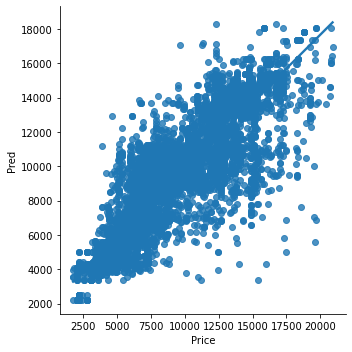

In [85]:
sn.lmplot(x='Price',y='Pred',data=df)

#### Y_test VS Y_Pred Values

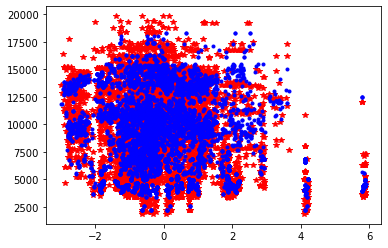

In [86]:
plt.plot(X_test,y_test,'r*')
plt.plot(X_test,stack.predict(X_test),'b.')
plt.show()

#### Distribution Plots 

<AxesSubplot:xlabel='Pred', ylabel='Density'>

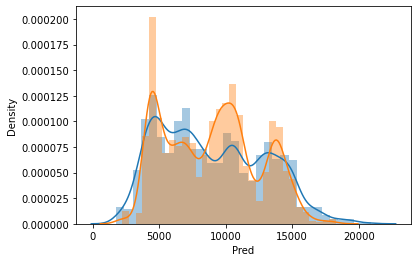

In [87]:
sn.distplot(df['Price'])
sn.distplot(df['Pred'])

#### Saving The best model

In [88]:
joblib.dump(stack,'Flight_Price.pkl')

['Flight_Price.pkl']